In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipotle_data = pandas.read_csv(url, sep = '\t')

chipotle_data.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [2]:
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


Based on the method we used,
1. There were 4622 different rows in the data set.
2. On average, people ordered 1 item.
3. The minimum quantity of items ordered is 1.
4. There were 1834 orders in total.
5. The largest quantity of things ordered for only 1 kind of item was 15.
6. Less than 25 % of people ordered more than 1 item.

In [3]:
# listing all the columns and their data types.
chipotle_data.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [4]:
# figure out all the items that can be ordered
# how many times each ordered

group = chipotle_data.groupby('item_name').sum()
group = group.sort_values("quantity", ascending=False)
group
most_ordered_item = group.head(1).quantity

# most_ordered_item = group.loc[0:1, ["item_name"]]
print(most_ordered_item)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64


The most ordered item is Chicken Bowl and it was ordered 761 times.

In [5]:
# total revenue from chipotle
total_revenue = 0

for index, row in chipotle_data.iterrows():
    price = float(row.item_price[1:])
    quantity = row.quantity
    total_revenue += price * quantity

print(f"Total Revenue: $ {total_revenue:.2f}")

Total Revenue: $ 39237.02


In [6]:
# number of orders placed
order_ids = chipotle_data.order_id
print(f"The number of orders placed is {max(order_ids.unique())}.")

The number of orders placed is 1834.


In [7]:
# items > $10
items = set()

for index, row in chipotle_data.iterrows():
    price = float(row.item_price[1:])

    if price > 10:
        item_name = row.item_name
        items.add(item_name)

print("Items that cost more than $10.00:\n", items)

Items that cost more than $10.00:
 {'Steak Crispy Tacos', 'Carnitas Crispy Tacos', 'Carnitas Soft Tacos', 'Steak Burrito', 'Steak Salad Bowl', 'Veggie Burrito', 'Steak Bowl', 'Chicken Salad Bowl', 'Barbacoa Crispy Tacos', 'Steak Soft Tacos', '6 Pack Soft Drink', 'Barbacoa Burrito', 'Chicken Salad', 'Barbacoa Salad Bowl', 'Bottled Water', 'Veggie Bowl', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Side of Chips', 'Chicken Soft Tacos', 'Chicken Burrito', 'Chicken Bowl', 'Bowl', 'Barbacoa Bowl', 'Veggie Salad Bowl', 'Carnitas Bowl', 'Carnitas Burrito', 'Veggie Soft Tacos', 'Barbacoa Soft Tacos', 'Chicken Crispy Tacos', 'Carnitas Salad Bowl'}


In [8]:
# all unique items
unique_items = chipotle_data["item_name"].unique()
unique_items

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

<Axes: xlabel='quantity', ylabel='item_name'>

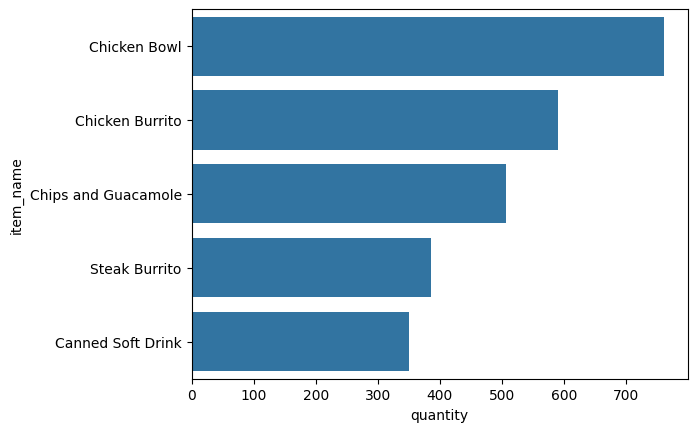

In [18]:
# bar graph of top 5 items sold
seaborn.barplot(group.head(), y='item_name', x='quantity')

In [19]:
# pie chart showing
group

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...
Chips,208004,230,0,$2.15 $2.15 $2.15 $2.15 $2.15 $2.15 $4.30 $2.1...
Steak Bowl,193752,221,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.99 $8.99 $11.75 $11.75 $8.99 $11.48 $9.25 $...
Bottled Water,175944,211,0,$1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
Chips and Fresh Tomato Salsa,100419,130,0,$2.39 $2.39 $2.39 $2.95 $2.95 $2.95 $2.95 $2.3...


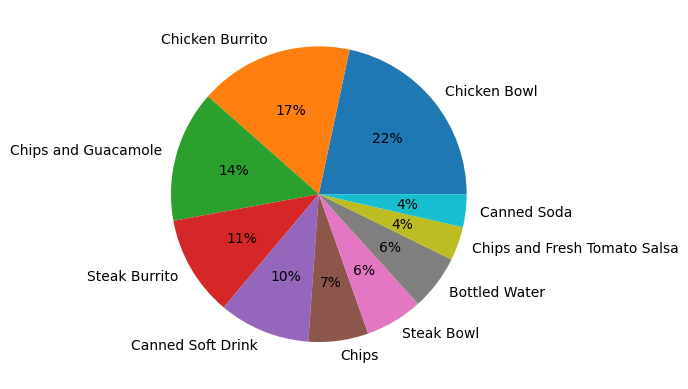

In [27]:
# Pie chart of top 10 items ordered.
item_names = group.head(10).index
quantities = group.head(10)["quantity"]
plt.pie(quantities, labels=item_names, autopct='%.0f%%')
plt.show()

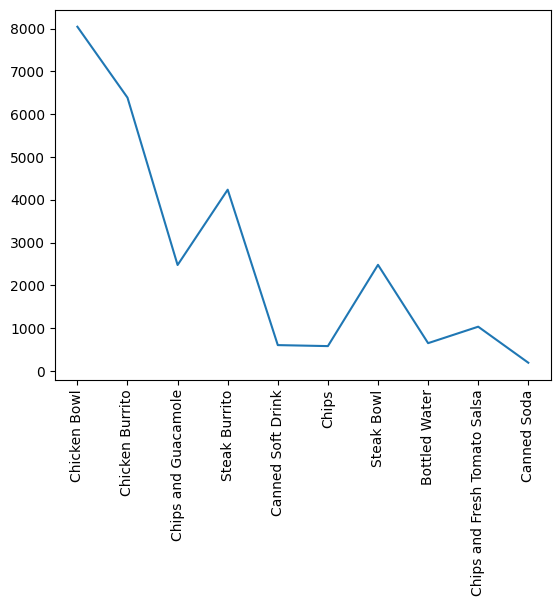

In [39]:
#
total_spent_per_item = {}

for index, row in chipotle_data.iterrows():
    item_name = row["item_name"]
    amount_spent = row["quantity"] * float(row["item_price"][1:])

    # total_spent_per_item[item_name] += total_spent_per_item.get(item_name, 0) + amount_spent

    if item_name in total_spent_per_item.keys():
        total_spent_per_item[item_name] += amount_spent
    else:
        total_spent_per_item[item_name] = amount_spent

total_spent_per_item

top10_names = []
top10_amount_spent = []

for name in group.head(10).index:
    top10_names.append(name)
    top10_amount_spent.append(total_spent_per_item[name])


plt.plot(top10_names, top10_amount_spent)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# plot all items and their quantities ordered from lowest to highest

,order_id,quantity,choice_description,item_price
item_name,,,,
Canned Soft Drink,304753,351,[Coke][Sprite][Coke][Coke][Lemonade][Sprite][D...,$1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.25 $1.2...
Steak Burrito,328437,386,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75 $9.25 $8.99 $11.75 $8.99 $8.99 $8.99 $8...
Chips and Guacamole,449959,506,0,$4.45 $4.45 $4.45 $4.45 $4.45 $3.99 $4.45 $3.9...
Chicken Burrito,497303,591,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49 $8.49 $10.98 $8.49 $10.98 $10.98 $8.75 $...
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Veggie Crispy Tacos'),
  Text(1, 0, 'Carnitas Salad'),
  Text(2, 0, 'Chips and Mild Fresh Tomato Salsa'),
  Text(3, 0, 'Crispy Tacos'),
  Text(4, 0, 'Salad'),
  Text(5, 0, 'Steak Salad'),
  Text(6, 0, 'Bowl'),
  Text(7, 0, 'Carnitas Salad Bowl'),
  Text(8, 0, 'Veggie Salad'),
  Text(9, 0, 'Burrito'),
  Text(10, 0, 'Veggie Soft Tacos'),
  Text(11, 0, 'Carnitas Crispy Tacos'),
  Text(12, 0, 'Chicken Salad'),
  Text(13, 0, 'Barbacoa Salad Bowl'),
  Text(14, 0, 'Barbacoa Crispy Tacos'),
  Text(15, 0, 'Chips and Roasted Chili-Corn Salsa'),
  Text(16, 0, 'Veggie Salad Bowl'),
  Text(17, 0, 'Izze'),
  Text(18, 0, 'Chips and Roasted Chili Corn Salsa'),
  Text(19, 0, 'Barbacoa Soft Tacos'),
  Te

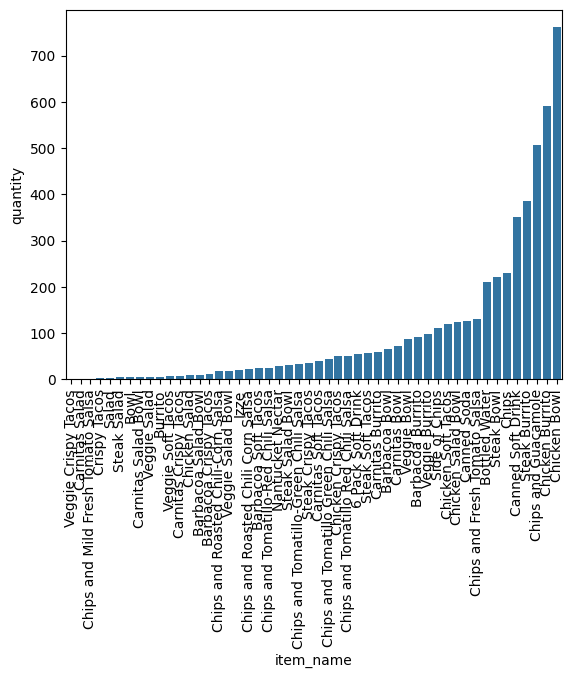

In [45]:
ascending_group = group.sort_values("quantity", ascending=True)
seaborn.barplot(ascending_group, x="item_name", y="quantity")
plt.xticks(rotation='vertical')
